In [ ]:
!pip install inference_sdk
!pip install openai==0.27.0
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics
!pip install -e .

Cloning into 'ultralytics'...
remote: Enumerating objects: 39112, done.
remote: Counting objects: 100% (2198/2198), done.
remote: Compressing objects: 100% (1159/1159), done.
remote: Total 39112 (delta 1494), reused 1561 (delta 1038), pack-reused 36914 (from 1)
Receiving objects: 100% (39112/39112), 31.10 MiB | 25.23 MiB/s, done.
Resolving deltas: 100% (28547/28547), done.
/content/ultralytics
Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for ultralytics (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.2.87-0.editable-py3-none-any.whl size=23163 sha256=b78a69e3111d72ede485b4e8653c43bae1f18fb0c386fd6b10432396ce608d11
  Stored in directory: /tmp/pip-ephem-wheel-cache-8204xfji/wheels/9a/cd/d5/95912172899f8ec640166ff6eef49156b1b00d6b2ade4a3c

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Weather forecast data retrieved successfully.

image 1/1 /content/drive/MyDrive/rocks_image.png: 640x576 78 Float_Rocks, 10.6ms
Speed: 3.0ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)


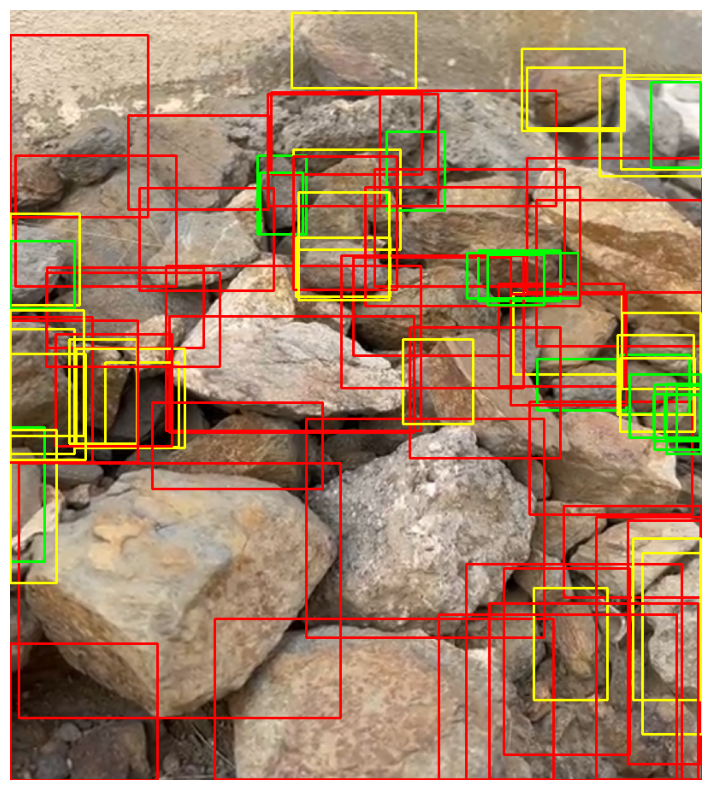

Weather Forecast for the next 16 days:
Date: 2024-09-04, Wind Speed: 14.940000000000001 km/h, Rain: 1.9 mm
Date: 2024-09-05, Wind Speed: 15.696000000000002 km/h, Rain: 4.11 mm
Date: 2024-09-06, Wind Speed: 14.184 km/h, Rain: 5.13 mm
Date: 2024-09-07, Wind Speed: 13.176 km/h, Rain: 2.51 mm
Date: 2024-09-08, Wind Speed: 13.572000000000001 km/h, Rain: 0.24 mm
Date: 2024-09-09, Wind Speed: 9.936 km/h, Rain: 1.29 mm
Date: 2024-09-10, Wind Speed: 12.384 km/h, Rain: 2.01 mm
Date: 2024-09-11, Wind Speed: 14.688 km/h, Rain: 1.2 mm
Date: 2024-09-12, Wind Speed: 9.864 km/h, Rain: 3.12 mm
Date: 2024-09-13, Wind Speed: 10.224 km/h, Rain: 3.75 mm
Date: 2024-09-14, Wind Speed: 14.544 km/h, Rain: 0.63 mm
Date: 2024-09-15, Wind Speed: 13.068 km/h, Rain: 0 mm
Date: 2024-09-16, Wind Speed: 9.324 km/h, Rain: 0 mm
Date: 2024-09-17, Wind Speed: 11.844000000000001 km/h, Rain: 0 mm
Date: 2024-09-18, Wind Speed: 12.492 km/h, Rain: 1.08 mm
Date: 2024-09-19, Wind Speed: 11.268 km/h, Rain: 0 mm
#### High Risk Dat

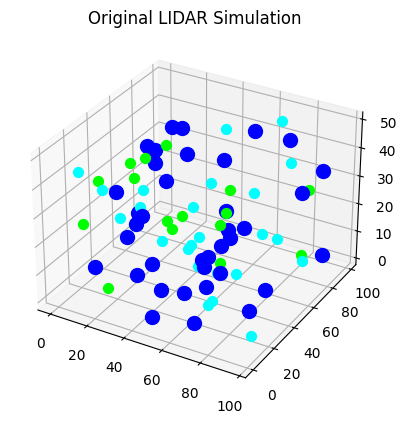

(image for the original lidar simulation without moving anything)
Large rock moved from (51, 0, 5) to (48, 2, 6)


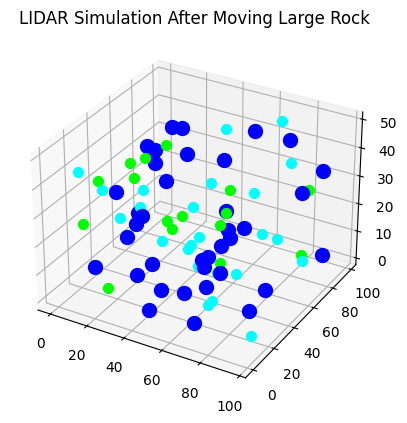

(image for the original lidar simulation with moving a large rock)
Sending alert to nearby people and authorities...


In [ ]:
# Install required libraries
!pip install ultralytics openai requests matplotlib numpy

import torch
import openai
import requests
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from ultralytics import YOLO
from datetime import datetime
import random

# Step 1: Load your custom YOLOv8 model
model = YOLO('/content/drive/MyDrive/best.pt')  # Replace with your model path

# Step 2: Take an image and process it through the YOLOv8 model with confidence threshold
def process_image(image_path, confidence_threshold=0.03):
    results = model(image_path, conf=confidence_threshold)
    return results

# Step 3: Classify the rocks based on the detections and highlight them
def classify_and_highlight_rocks(image_path, results):
    img = cv2.imread(image_path)
    classes = {'small': 0, 'medium': 0, 'large': 0}

    for detection in results[0].boxes:
        conf = detection.conf[0].item()
        if conf >= 0.03:  # Apply confidence threshold
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            width = x2 - x1
            height = y2 - y1
            area = width * height
            if area < 7000:  # Thresholds can be adjusted based on your model
                classes['small'] += 1
                color = (0, 255, 0)  # Green for small
            elif area < 15000:
                classes['medium'] += 1
                color = (0, 255, 255)  # Yellow for medium
            else:
                classes['large'] += 1
                color = (0, 0, 255)  # Red for large

            # Draw a rectangle around the detected rock
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    return img, classes

# Extract the positions of rocks for LiDAR simulation
def get_rock_positions(results):
    rocks = {'small': [], 'medium': [], 'large': []}

    for detection in results[0].boxes:
        conf = detection.conf[0].item()
        if conf >= 0.03:  # Apply confidence threshold
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            width = x2 - x1
            height = y2 - y1
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2
            area = width * height
            if area < 7000:  # Thresholds can be adjusted based on your model
                rocks['small'].append((center_x, center_y, area))
            elif area < 15000:
                rocks['medium'].append((center_x, center_y, area))
            else:
                rocks['large'].append((center_x, center_y, area))

    return rocks

# Step 4: Display the image with highlighted rocks
def display_image(img):
    # Convert image from BGR (OpenCV format) to RGB (matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Step 5: Get weather forecast for the next 16 days
def get_weather_forecast(latitude, longitude):
    OWM_API_KEY = "*********************" # Hidden Key
    OWM_ENDPOINT = "http://api.openweathermap.org/data/2.5/forecast/daily"
    url = f"{OWM_ENDPOINT}?lat={latitude}&lon={longitude}&cnt=16&appid={OWM_API_KEY}&units=metric"
    try:
        response = requests.get(url)
        weather_data = response.json()
        if 'list' in weather_data:
            # Convert wind speed from m/s to km/h
            for day in weather_data['list']:
                day['speed'] = day.get('speed', 0) * 3.6  # Convert m/s to km/h
            return weather_data['list']  # Return the 16-day forecast
        else:
            print("Unexpected weather data format:", weather_data)
            return None
    except Exception as e:
        print("Error getting weather forecast data:", e)
        return None

def format_weather_forecast(weather_forecast):
    formatted_forecast = []
    for day in weather_forecast:
        date = datetime.utcfromtimestamp(day['dt']).strftime('%Y-%m-%d')
        wind_speed = day.get('speed', 0)
        rain = day.get('rain', 0)
        formatted_forecast.append(f"Date: {date}, Wind Speed: {wind_speed} km/h, Rain: {rain} mm")
    return formatted_forecast
#Abha lat & long
latitude = 18.162099
longitude = 42.506832

weather_forecast = get_weather_forecast(latitude, longitude)

# Step 6: Send the weather forecast with the number of rocks to our model in OpenAI
openai.api_key = '*******************************'  # Hidden Key 

def get_risk_analysis(rocks, weather_forecast):
    messages = [
        {
            "role": "system",
            "content": "You are an expert in analyzing rockfall risks based on weather forecasts and detected rock sizes."
        },
        {
            "role": "user",
            "content": f"""
            Given the following weather forecast and rock sizes, analyze the potential rockfall risk over the next 16 days.

            Rock counts:
            - Small: {rocks['small']}
            - Medium: {rocks['medium']}
            - Large: {rocks['large']}

            Weather forecast:
            {weather_forecast}

            Identify the dates with high risk of rockfall and any other observations.
            """
        }
    ]

    response = openai.ChatCompletion.create(
        model="ft:gpt-4o-mini-2024-07-18:personal::A3B8CJUE",
        messages=messages,
        max_tokens=150
    )

    return response.choices[0].message['content'].strip()

if weather_forecast:
    print("Weather forecast data retrieved successfully.")
    # Example image processing
    image_path = '/content/drive/MyDrive/rocks_image.png'  # Replace with your image path
    results = process_image(image_path, confidence_threshold=0.03)
    img, rocks = classify_and_highlight_rocks(image_path, results)

    # Display the image with detected rocks
    display_image(img)

    # Step 7: Print the formatted weather forecast before AI analysis
    formatted_forecast = format_weather_forecast(weather_forecast)
    print("Weather Forecast for the next 16 days:")
    for entry in formatted_forecast:
        print(entry)

    # Step 8: Get AI analysis
    analysis = get_risk_analysis(rocks, formatted_forecast)

    # Step 9: Display the results
    if "high risk" in analysis.lower():
        print(analysis)
    else:
        print("There is no significant risk in the next 16 days.")

# Transition to the second part of the process: LiDAR Simulation and Rock Movement

print("----------------------------------------------------------------------------------------------------------")
# Step 10: LIDAR 3D Simulation and Rock Movement Detection

# Function to simulate a 3D LIDAR scan using detected rocks
def lidar_simulation(rocks):
    lidar_data = []
    for rock_size, count in rocks.items():
        for i in range(count):
            x = np.random.randint(0, 100)
            y = np.random.randint(0, 100)
            z = np.random.randint(0, 50)  # Z is the height component
            color = (0, 255, 0) if rock_size == 'small' else (0, 255, 255) if rock_size == 'medium' else (0, 0, 255)
            lidar_data.append({'position': (x, y, z), 'size': rock_size, 'color': color})
    return lidar_data

# Function to plot the LIDAR simulation data
def plot_lidar_simulation(lidar_data, title="LIDAR Simulation"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)

    for rock in lidar_data:
        ax.scatter(*rock['position'], color=np.array(rock['color'])/255.0, s=100 if rock['size'] == 'large' else 50)

    plt.show()

# Simulate the LIDAR data
lidar_data = lidar_simulation(rocks)

# Plot the original LIDAR simulation
plot_lidar_simulation(lidar_data, title="Original LIDAR Simulation")

print("(image for the original lidar simulation without moving anything)")

# Function to move a large rock randomly
def move_large_rock(lidar_data):
    for rock in lidar_data:
        if rock['size'] == 'large':
            old_position = rock['position']
            rock['position'] = (
                old_position[0] + np.random.randint(-5, 5),
                old_position[1] + np.random.randint(-5, 5),
                old_position[2] + np.random.randint(-5, 5)
            )
            print(f"Large rock moved from {old_position} to {rock['position']}")
            return old_position, rock['position']

# Detect movement and send a warning
def detect_movement_and_warn(old_position, new_position):
    if old_position != new_position:
        print(f"Warning: Large rock has moved from {old_position} to {new_position}.")
        print("Sending alert to nearby people and authorities...")

# Simulate moving a large rock
old_position, new_position = move_large_rock(lidar_data)

# Plot the LIDAR simulation after moving the rock
plot_lidar_simulation(lidar_data, title="LIDAR Simulation After Moving Large Rock")

print("(image for the original lidar simulation with moving a large rock)")

# Detect the movement and issue a warning
detect_movement_and_warn(old_position, new_position)
